# 머신러닝 알고리즘
---------------------------
### 머신러닝이란?
    데이터로부터 학습하도록 컴퓨터를 프로그래밍하는 과학

### 회귀(Regression)
    - 선형 모델
    
### 분류(Classification)
    - 로지스틱 선형 모델
    - KNN(K-Nearest Neighbors) : 별도의 알고리즘이 없다.
    - Decision Tree
    - Random Forest
    - SVM(Support Vector Machine)
    
### 인공신경망(Neural Network)


In [1]:
#!pip install mglearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
# 음수기호 표시 안되는거 해결
rcParams["axes.unicode_minus"] = False

(26, 2)


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


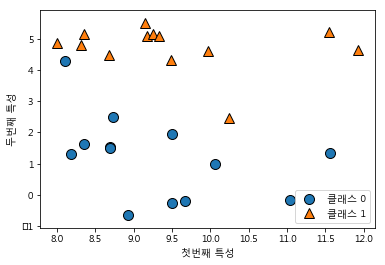

In [21]:
x, y = mglearn.datasets.make_forge()  # make_forge() : 분류시에 아주 적합한 데이터 제공
x  # <- 배열(numpy이용하여 조회된 것), forge라는 데이터임..
y
# 산포도
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

print(x.shape)

Text(0, 0.5, '타겟')

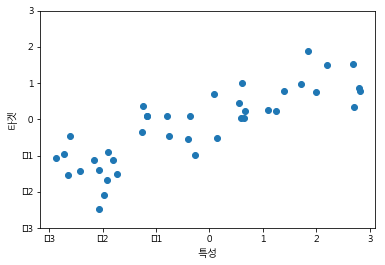

In [27]:
X, y = mglearn.datasets.make_wave(n_samples=40)  # () 안에 데이터 갯수 지정 가능
plt.plot(X,y, 'o')
# y범위조절
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타겟")

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
cancer.data.shape
# 총 569개 데이터 중에서 212개는 악성이고 357개는 양성이다. (결과 미리..)
#cancer.target_names  # 'malignant', 'benign'
#np.bincount(cancer.target)  # 카테고리에 따라 빈도수 세기  [212,357]

# key와 value로 묶어서 출력
print("클래스별 샘플 갯수 : \n{}".format({n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("특성 이름:\n{}".format(cancer.feature_names))
cancer.DESCR

클래스별 샘플 갯수 : 
{'malignant': 212, 'benign': 357}
특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [51]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
boston.data.shape  # (506, 13)

# 컬럼의 수를 늘린 데이터
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

-----------------------------------------------
# KNN
    k - 묶음의 갯수 -> 묶을 때 홀수 개로 묶어야 깔끔한 분류 가능
    거리를 따지는 공식 - L1 norm : 절대값의 거리 합 (*맨하탄 거리)
                       L2 norm : p=2, 각 x를 제곱해서 다 더한 다음 마지막에 루트를 취한다. 
                       (*피타고라스의 최단거리, 유클리드 거리) -> KNN, K-means
                       
    1) 가장 중요한 매개변수
        - 이웃의 갯수(k)
        - 데이터 포인트 사이의 거리를 재는 방법 : L2 norm - 각 거리의 제곱의 합에 루트를 취한 것
        
    2) 특징
        - 이해하기 쉬운 모델
        - 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 알고리즘
        - 훈련세트가 너무 크면 예측이 느려진다.
--------------------------------------------------

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


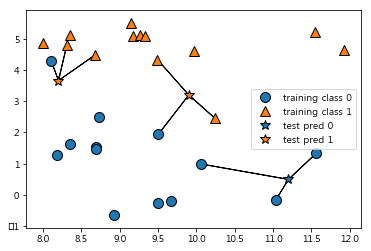

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 이웃을 몇 개씩 묶는게 가장 적절할까?

In [9]:
# train과 test를 나눠주는 방법
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()  # x와 y를 8:2로 나누는 등....

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
# random_state=0 : 여러번 실행해도 같은 값 나올 수 있게..? (난수 발생을 위한 seed의 인자값) , 나뉘는 기본값은 7.5:2.5

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)   # fit : 훈련시킨다. 학습시킨다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
dir(clf)
print("테스트 셋 예측 : {}".format(clf.predict(X_test)))

테스트 셋 예측 : [1 0 1 0 1 0 0]


In [13]:
print("테스트 셋 정확도 : {}".format(clf.score(X_test, y_test)))  #0.8571

테스트 셋 정확도 : 0.8571428571428571


Figure(720x216) , [<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4F03C8>


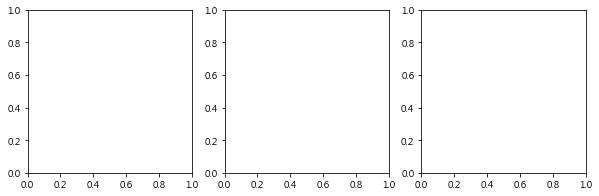

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
print(fig,",", axes)

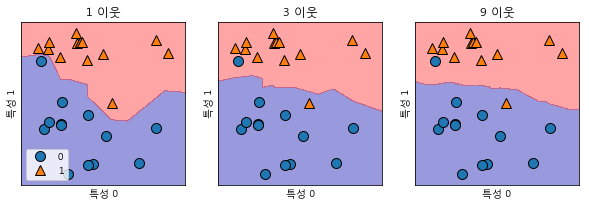

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes): 
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    # 훈련결과값
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, fill=True, alpha=.4, eps=0.5)  # alpha는 투명도 0~1 사이
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

#과적합 문제 
# 1이웃 : 분류 good, but 새로운 데이터에 대한 예측력은 낮다. 과적합 그러나 일반화는 좋다?
# 3이웃, 9이웃 : 복잡화가 적어짐.. 

In [41]:
# 일반화와 복잡도의 관계 입증
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

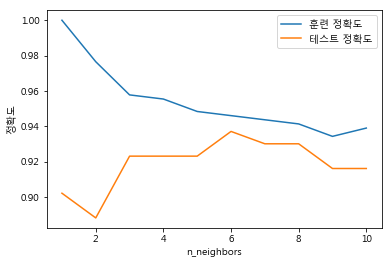

In [45]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
# 이웃을 6으로 묶었을 때 훈련 정확도와 테스트 정확도 사이의 gap이 제일 작다.
# 사실 1 이웃도 결과값나ㅃ지않다. (테스트그래프로 정확도 수치가 낮은 편이 아님) 0.8881

In [49]:
print(test_accuracy[1])

0.8881118881118881


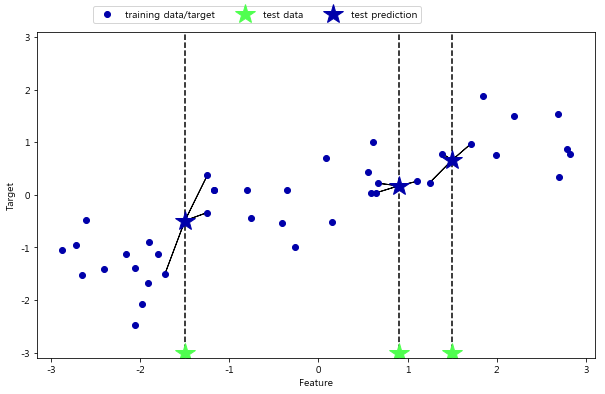

In [51]:
# 회귀분석을 위한 KNN

mglearn.plots.plot_knn_regression(n_neighbors=3)
# x축에 3개의 테스트 데이터를 녹색 별로 표시
# 3개의 녹색 테스트 데이터를 기준으로 가장 이웃한 3개의 최근접 데이터 포인트
# 그러고나서 각 데이터포인트사이의 거리의 역수를 가중치로 타겟 값을 산정

In [52]:
from sklearn.neighbors import KNeighborsRegressor    # KNN 회귀분석?

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
# 객체 생성 후 훈련시키기
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

'''
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights(가중치)='uniform') # 지정값 'uniform', 'distance(거리에 따라 가중치를 더 부여)'
          
          # uniform :  All points in each neighborhood are weighted equally.
          # distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
'''

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [56]:
print("테스트 세트 예측: \n {}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))   # 소수점 둘째짜리까지만 표시하게끔 하는 코드
# 상관계수(R^2) : 0.83

테스트 세트 예측: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


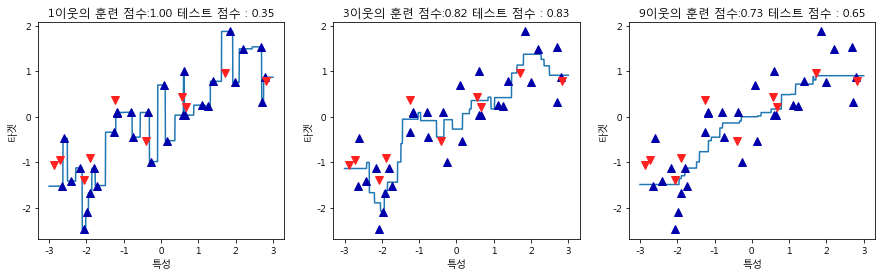

In [65]:
# 분석

fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 반복 돌면서 각각의 그래프에 훈련결과를 뿌린다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    # 데이터 표시
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)   # ^ 모양으로 그리고, 색도 지정
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    # title 에 성적표시
    train = reg.score(X_train, y_train)
    test = reg.score(X_test, y_test)
    ax.set_title("{}이웃의 훈련 점수:{:.2f} 테스트 점수 : {:.2f}".format(n_neighbors, train, test))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")

#### iris 데이터로 KNN

In [73]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()
print(iris_dataset.target_names)
print(iris_dataset.feature_names)
print(type(iris_dataset.data))  # numpy.ndarray(배열 형식)
print(iris_dataset.data.shape)  # (150, 4)

# 정답 미리 확인해보기
print(iris_dataset.target)

X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset.target, random_state=0)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'>
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [74]:
print("X_train의 크기 : {}".format(X_train.shape))  # (112, 4)
print("X_test의 크기 : {}".format(X_test.shape))  # (38, 4)

X_train의 크기 : (112, 4)
X_test의 크기 : (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9201D0>,
      dtype=object)

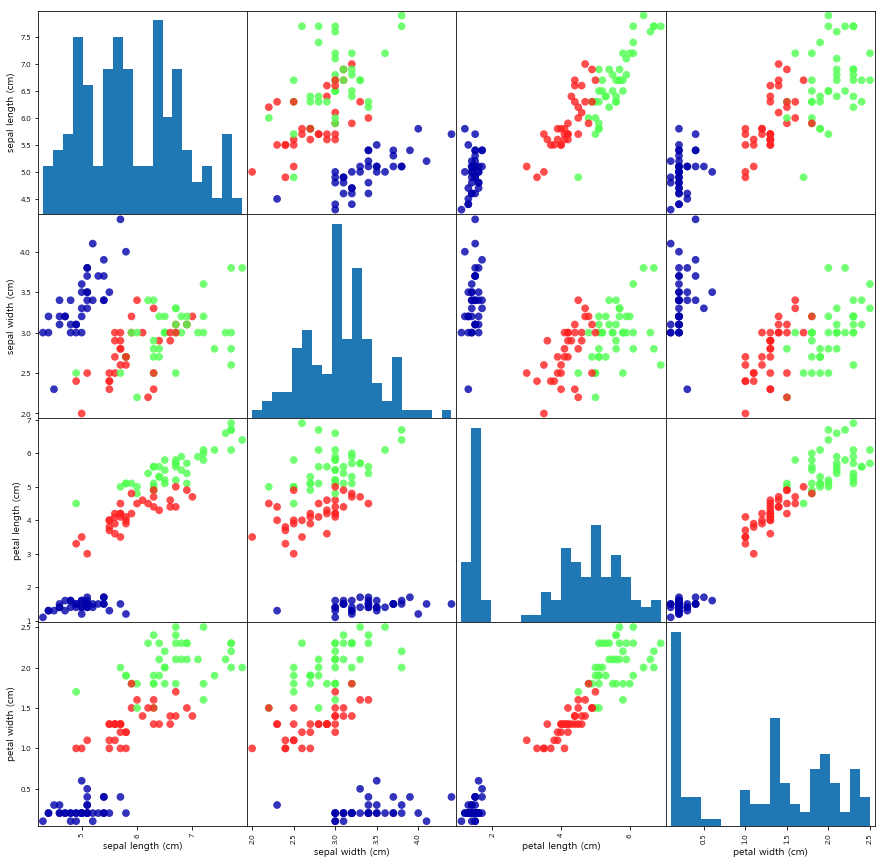

In [79]:
# pandas 
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), marker="o", c=y_train, hist_kwds={"bins":20}, s=60, alpha=.8, cmap=mglearn.cm3)   # pandas안의 데이터를 바로 행렬로 표현하는 함수

# setosa의 경우 다른 것과 비교하여서 더 확실하게 분류가 되었다. <-? 품종 파악을 어떻게 하지?

In [80]:
# 훈련시키기
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [81]:
# 훈련시킨거 확인해보기
pred = knn.predict(X_test)

In [84]:
# 정확도 측정 (y_test가 정답..?)
print("정확도 : ", knn.score(X_test, y_test))  # 0.97368
print("정확도 : ", np.mean(pred == y_test))  # 상동

정확도 :  0.9736842105263158
정확도 :  0.9736842105263158


In [85]:
# 꽃받침의 길이가 5cm, 폭 2.9cm, 꽃잎길이 1cm, 폭 0.2cm 인 붓꽃의 품종은?
X_new = np.array([[5, 2.9, 1, 0.2]])
pred = knn.predict(X_new)

In [89]:
pred  # array([0]) <-setosa
print(iris_dataset["target_names"][pred])

['setosa']


### 영화 분류기

In [105]:
#from IPython.display import Image
#Image("img/knn_work.png")

![knn](img/knn_work.png)

In [117]:
import operator

def createDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ['Action', 'Action', "Romance", "Romance"]
    return group, label

def calcDistance(inX, dataSet, labels, k):
    # 유클리드 공식 이용
    # shape is a tuple that gives dimensions of the array
    # shape[0] returns the number of rows, here will return 4
    dataSetSize = dataSet.shape[0]  # dataSetSize = 4
    
    # numpy.tile(A, reps): construct an array by repeating A the number of times given by reps
    # if reps has length d, the result will have dimension of max(d, A.ndim)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet  # tile : 같은 행을 반복해서 행렬을 만든다
    
    # **2 means square
    sqDiffMat = diffMat ** 2

    # sqDistances = x^2 + y^2
    sqDistances = sqDiffMat.sum(axis=1)
    
	# distance is equal to the square root of the sum of the squares of the coordinates
    distances = sqDistances ** 0.5
   
    # numpy.argsort() returns the indices that would sort an array
    # here returns [0 1 3 2]
    sortedDistIndices = distances.argsort()  # argsort() : 정렬을 하기위한 인덱스
    return sortedDistIndices

def findMajorityClass(inX, dataSet, labels, k, sortedDistIndices):
    classCount = {}   # iterate k times from the closest item
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]] 
        # increase +1 on the selected label
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1   # 장르 카운트
		
    # classCount dictionary : {'Action': 2, 'Romantic': 1}
    # sort ClassCount Descending order
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)  # 값으로 접근:itemgetter

def classify(inX, dataSet, labels, k):
    # calculate the distance between inX and the current point
    sortedDistIndices = calcDistance(inX, dataSet, labels, k)
    
	# take k items with lowest distances to inX and find the majority class among k items
    sortedClassCount = findMajorityClass(inX, dataSet, labels, k, sortedDistIndices)
    
	# sortedClassCount is now [('Action', 2)], therefore return Action
    return sortedClassCount[0][0]

In [112]:
group, label = createDataSet()
# 어떤 영화인지 분류해보기
result = classify([2.0, 3.0], group, label, 3)
print("결과는 {} 이다.".format(result))

결과는 Action 이다.


In [ ]:
# tile 살펴보기
np.tile()